# <center> Project 1 - Unsupervised Learning Classification</center>
## <center> Due: Oct 15$^{th}$ 11:59 PM</center>

In this project, we are going to implement models. Unfortunately, the data set, `CS559_Fall21_Project1_02.csv`, is not labeled except the target, `Class`, and therefore, we can not straightly use supervised leanring algorithms until we learn about data - using unsupervised learning techniques in preprocessing is essential. To build models, we are allowed to use any of provided modules and libraries. **The exploratory and feature engineerings are required but not limited - all your work and process must be justified and explained in notebook.**

### Models:
- You are going to build three different classifiers using KMeans, K Nearest Neighbor (KNN), and Logistic Regression. 
    - KMeans: KMeans arbitrary use ID indices. Cluster ID indicates the subgroup number each observation belongs to and **it does not neccessary need to have the same ID as the target ID**. The task is to check whether the model clusters and subgroups each observation to the same classes. Then perform data preprocessing in order to subgroup observations correctly as much as possible. In order to check the accuracy of clustering, the cluster IDs  may need to be **relabeled** to match with their subgroup `Class` IDs. 
    - KNN: The accuracy of KNN will likely to decrease as k value increases. The task is to determine the threshold of k value reaches to **95%**. 
    - Logistic Regression: There are several assumptions/conditions needed in order for Logistic Regression to perform well. The task is to EDA to verify if the data is suitable for Logistic Regression and perform data preprocessing to raise the accuracy of model as high as possible. When the model was applied to the raw data, the accuracy was around 35%. 
- In this project, we are not interested in optimizing the models by tunning hyperparameters. Therefore, validation and testing are not necessary. Use the entire dataset as a train data set.     
- Accuracy Report: The accuracy is the accuracy of trained model (remember that we do not split the data set). The accuracy must be reported in Data Frame format as an example shown below. When you report the accuracy of models, please provide the name of algorithms, number of features used, and the accuracy in percentile. 
|Model Number | Algorithm (s)| Number of features | Accuracy (%)|
|---|---|---|---|
| 0 | Logistic Regression | 3 | 35%|
| 1 | KMeans | -- | -- |
| 2 | KNN | -- | -- |
| 3 | Logistic Regression | -- | -- |

### Grade Scheme: 

| Components | Maximum Points |
| --- | --- |
| Effort (cleanness, completeness, etc)| 20 |
| EDA and Feature Engineering (w/ visualizations) | 20 |
| Modeling | 20 |
| Explanation (w/ visualizations) | 20 |
| Result | 20 |


### Submission:
- No formal report. However, all work (EDA, Preprocessing, Modeling) must be **explained and summarized** at the end of each model, not in the middle of implementations. 
- Submit the notebook and its exported HTML files. 
- Considering the working period of the project, **NO LATE SUBMISSIONS ARE ACCEPTED**. 
- No resubmissions due to incorrect files, corrections, etc. 

#### Below, the libraries needed for this project are provided and plotting in 2-D and 3-D are also provided. 

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
def plot_2D(df,comp1,comp2,target):
    sns.scatterplot(x=comp1,y=comp2,data=df,hue=target)

def plot_3D(df, comp1,comp2,comp3,target):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df[comp1],df[comp2],df[comp3],c=df[target])
    ax.set_xlabel(comp1)
    ax.set_ylabel(comp2)
    ax.set_zlabel(comp3)
    plt.show()

In [4]:
df = pd.read_csv('./CS559_Fall21_Project1_02.csv')

In [5]:
df.head(5)

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,Class
0,0,9.4202,-4.3507,10.3764,0.66768,0.33387,0.33355,0.33399,0.33367,0.33391,1
1,1,9.7044,-4.4601,10.6803,0.66749,0.33360,0.33352,0.33345,0.33363,0.33395,1
2,2,9.8075,-4.0894,10.6259,0.66742,0.33347,0.33315,0.33301,0.33364,0.33364,1
3,3,9.2771,-4.0349,10.1166,0.66782,0.33322,0.33394,0.33379,0.33380,0.33391,1
4,4,9.6447,-3.5968,10.2936,0.66768,0.33391,0.33301,0.33306,0.33326,0.33329,1


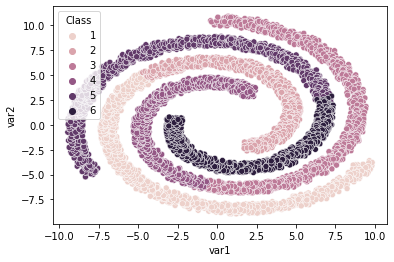

In [6]:
plot_2D(df,'var1', 'var2','Class')

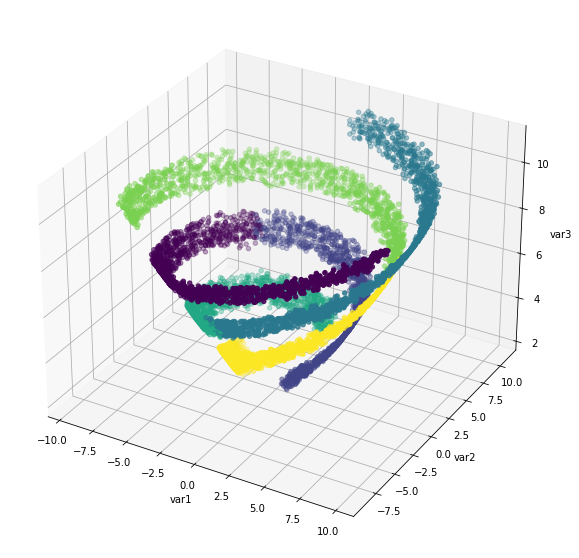

In [7]:
plot_3D(df,'var1','var2','var3','Class')

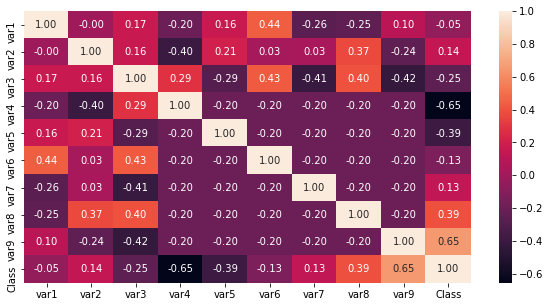

In [10]:
knn_df = df.copy()
standard_df = pd.DataFrame()
for c in knn_df.columns:
    if c == 'var0': 
        continue
    elif c == 'Class':
        standard_df['Class'] = knn_df[c].values.ravel()
        continue
    sc = StandardScaler()
    standard_df[c] = sc.fit_transform(knn_df[c].values.reshape(-1,1)).ravel()
    
standard_corr = standard_df.corr()
fig, ax = plt.subplots(1, figsize = (10,5))
sns.heatmap(standard_corr, annot = True, fmt = '.2f', xticklabels = standard_corr.columns, yticklabels = standard_corr.columns, 
            ax = ax)
plt.show()

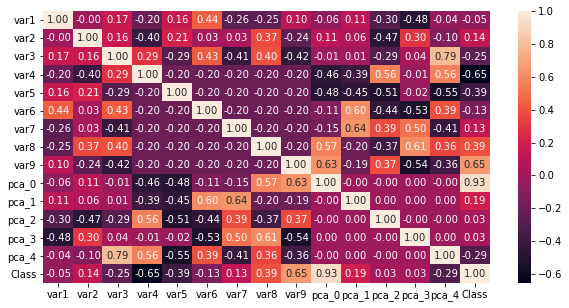

In [34]:
pca = PCA(n_components = .75)
pca_features = standard_df[[f'var{i}' for i in [4, 5, 6, 8]]]
pca_transformed = pca.fit_transform(pca_features)
for i in range(0, pca_transformed.shape[-1]):
    standard_df[f'pca_{i}'] = pca_transformed[:,i]
standard_df = standard_df[[i for i in standard_df.columns if i not in ['var0', 'Class']]+ ['Class']]
standard_corr = standard_df.corr()
fig, ax = plt.subplots(1, figsize = (10,5))
sns.heatmap(standard_corr, annot = True, fmt = '.2f', xticklabels = standard_corr.columns, yticklabels = standard_corr.columns, 
            ax = ax)
plt.show()


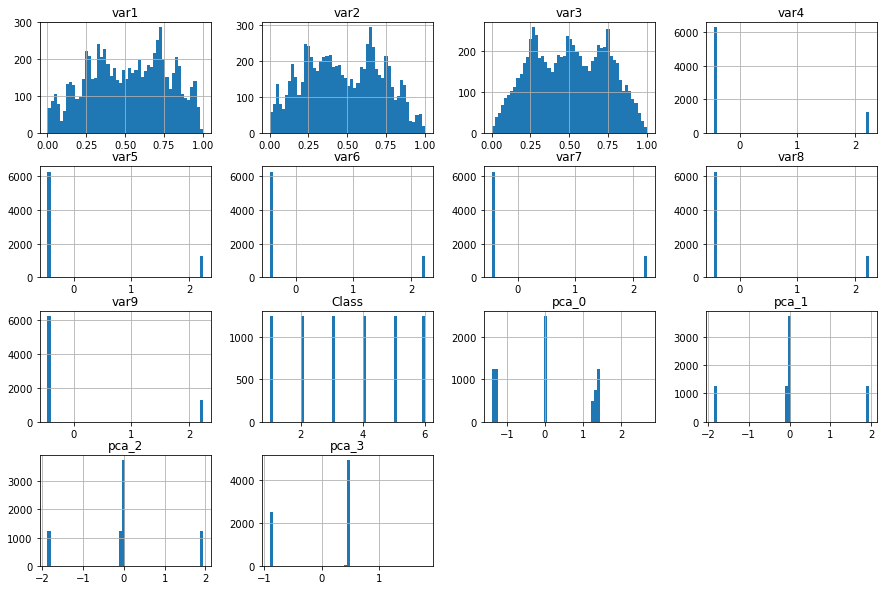

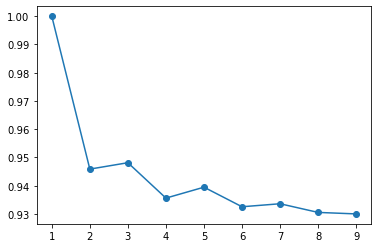

In [63]:
normal_standard_df = pd.DataFrame() #.copy()
for c in df.columns: 
    if c == 'var0':
        continue
    elif c =='Class': 
        normal_standard_df['Class'] = df['Class']
        continue
    if c in ['var1', 'var2', 'var3']: 
        sc = MinMaxScaler()
    else:
        sc = StandardScaler()
    normal_standard_df[c] = sc.fit_transform(df[c].values.reshape(-1,1)).ravel()
pca = PCA(n_components = .9)
pca_features = normal_standard_df[[f'var{i}' for i in [4, 5, 6, 8]]]
pca_transformed = pca.fit_transform(pca_features)
for i in range(0, pca_transformed.shape[-1]):
    normal_standard_df[f'pca_{i}'] = pca_transformed[:,i]
    
normal_standard_df.hist(bins = 50, figsize = (15,10))
plt.show()

X = normal_standard_df[['var3'] + [i for i in normal_standard_df.columns if 'pca' in i]]#[['var1', 'var2', 'var4']] #WORKS!! 
y = normal_standard_df[['Class']].values
accuracy_list = []
neighbors_list = list(range(1, 10))
for i in neighbors_list:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X,y.ravel())
    y_predict = knn.predict(X)
    accuracy = accuracy_score(y_predict, y)
    accuracy_list.append(accuracy)
    print(f'Testing n_neigbors = {i} | Accuracy = {accuracy}', end = '\r')

plt.plot(neighbors_list, accuracy_list, marker = 'o')
# X = standard_df[['var1', 'var2', 'var3', 'var4']] # standard_df[[i for i in standard_df.columns if 'pca' in i]]
# y = standard_df[['Class']].values
# accuracy_list = []
# neighbors_list = list(range(1, 500))
# for i in neighbors_list:
#     knn = KNeighborsClassifier(n_neighbors = i)
#     knn.fit(X,y.ravel())
#     y_predict = knn.predict(X)
#     accuracy = accuracy_score(y_predict, y)
#     accuracy_list.append(accuracy)
#     print(f'Testing n_neigbors = {i} | Accuracy = {accuracy}', end = '\r')

# plt.plot(neighbors_list, accuracy_list, marker = 'o')


In [ ]:
normal_corr = normal_standard_df.corr()
sns.heatmap(normal_corr, xticklabels = normal_corr.columns, yticklabels = normal_corr.columns, 
           annot = True, fmt = '.2f')

In [ ]:
X = standard_df[['var1', 'var2', 'var4']] # standard_df[[i for i in standard_df.columns if 'pca' in i]]
y = standard_df[['Class']].values
accuracy_list = []
neighbors_list = list(range(1, 500))
for i in neighbors_list:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X,y.ravel())
    y_predict = knn.predict(X)
    accuracy = accuracy_score(y_predict, y)
    accuracy_list.append(accuracy)
    print(f'Testing n_neigbors = {i} | Accuracy = {accuracy}', end = '\r')

plt.plot(neighbors_list, accuracy_list, marker = 'o')


In [39]:
# columns = [('var1', 0), ('var2', .25)]#, ('var3', 5.75, '7.75')]
# for c, cutoff in columns:
#     k_means_df[f'{c}_mapped'] = k_means_df[c].map(lambda x: 0 if x <= cutoff else 1)
# k_means_df['var1_2_summed'] = k_means_df[['var1_mapped', 'var2_mapped']].sum(axis = 1)
# unique_classes = subset_df.Class.unique()
# fig, ax = plt.subplots(1, 3, figsize = (15, 5))
# for idx, c in enumerate(k_means_df.var1_2_summed.unique()):
#     subset_df = k_means_df[k_means_df.var1_2_summed == c]
#     y = [len(subset_df[subset_df.Class == i]) for i in unique_classes]
#     ax[idx].bar(unique_classes, y)
#     ax[idx].set_ylabel('Frequency')
#     ax[idx].set_title('Class Distribution for every unique value in column var1_2_summed')
# plt.show()

# k_means_df = k_means_df[[i for i in k_means_df.columns if i not in ['var0', 'Class']] + ['Class']]
# plt.figure(figsize= (20,4))
# plt.title('Correlation Matrix of Original Data')
# correlation_matrix = k_means_df.corr()
# sns.heatmap(correlation_matrix, cmap = 'coolwarm', xticklabels = correlation_matrix.columns, yticklabels = correlation_matrix.columns, annot= True)

In [40]:
# accuracy_list

### Project 1 Starts from here

#### Model 1: KMeans

##### EDA / Preprocessing

In [ ]:
##### EDA / Preprocessing starts here

##### Model Implementation

In [ ]:
##### Model Implementation starts here

##### Summary:

#### Model 2: KNN

##### EDA / Preprocessing

In [ ]:
##### EDA / Preprocessing starts here

##### Model Implementation

In [ ]:
##### Model Implementation starts here

#### Summary:

#### Model 3: Logistic Regression

##### EDA / Preprocessing

In [ ]:
##### EDA / Preprocessing starts here

##### Model Implementation

In [ ]:
##### Model Implementation starts here

##### Summary:

### Final Result Table:

In the result table, show only the **best result** obtained in each model. If the dataset were splitted into train and test sets, report the average of accuracy of train and test sets. 

In [ ]:
Result1 = {'Model': [0,1,2,3,4], 'Algorithm':['KMeans','KNN','Logistic Regression'],'Number of Features': [],
           'Accuracy':[]}

Result1 = pd.DataFrame(Result1, columns = ['Model Number', 'Algorithm','Number of Features','Accuracy'])

